In [2]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
from itertools import product

import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import metrics

pd.options.display.max_columns = 100
pd.options.display.max_rows = 100

In [3]:
def parse_d(row, d_names):
    rng = range(row['groups'])
    for i, j in product(rng, rng):
        row[f'd_{i+1}{j+1}'] = row['d'][i,j]
        
    return row[d_names]

def parse_var(row, var_names, var):
    for i in range(row['groups']):
        row[f'{var}_{i+1}'] = row[var].flatten()[i]
    return row[var_names]

def parse_test(path=None):
    
    if path:
        base = pd.read_pickle(specific_file)
    else:
        l = [file_name for file_name in os.listdir() if os.path.splitext(file_name)[1] == '.pickle']

        base = pd.concat([pd.read_pickle(path) for path in l], axis=0)
        base = base[base['l'].apply(lambda x: (x!=0).all())].reset_index(drop=True)
        
        
    for col in ['sol', 'sol_gov', 'sol_sec']:
        base = pd.concat([base.drop(col, axis=1), pd.json_normalize(base[col]).add_suffix('_' + col)], axis=1)

    for col in ['cost_sol', 'cost_sol_gov', 'cost_sol_sec']:
        base[col] = base[col].apply(lambda x: x.flatten())
        base[col] = pd.DataFrame(base[col].to_list()).sum(axis=1)


    base['sol_gap'] = base['cost_sol'] - base['cost_sol_gov']

    best_sol_indx = np.argmin(base[['cost_sol', 'cost_sol_gov', 'cost_sol_sec']].to_numpy(), axis=1)
    base['best_sol'] = np.take(['cost_sol', 'cost_sol_gov', 'cost_sol_sec'], best_sol_indx)
    
    base['groups'] = base['d'].apply(lambda x: x.shape[0])
    max_groups = base['groups'].max()
    rng = range(1, max_groups+1)
    
    d_names = [f'd_{i}{j}' for i, j in product(rng, rng)]
    base[d_names] = 0
    base[d_names] = base.apply(lambda row: parse_d(row, d_names), axis=1)

    l_names = [f'l_{i}' for i in rng]
    base[l_names] = 0
    base[l_names] = base.apply(lambda row: parse_var(row, l_names, 'l'), axis=1)

    v_names = [f'v_sol_{i}' for i in rng]
    base[v_names] = 0
    base[v_names] = base.apply(lambda row: parse_var(row, v_names, 'v_sol'), axis=1)
    
    return base
        
    

In [4]:
specific_file = r'/Users/danielablin/Documents/GitHub/Thesis/test_run_2022-12-11_129_100.pickle'
base = parse_test(specific_file)

In [5]:
base.groupby(['best_sol', 'msg_sol'])['best_sol'].count()

best_sol      msg_sol       
cost_sol_gov  found solution    100
Name: best_sol, dtype: int64

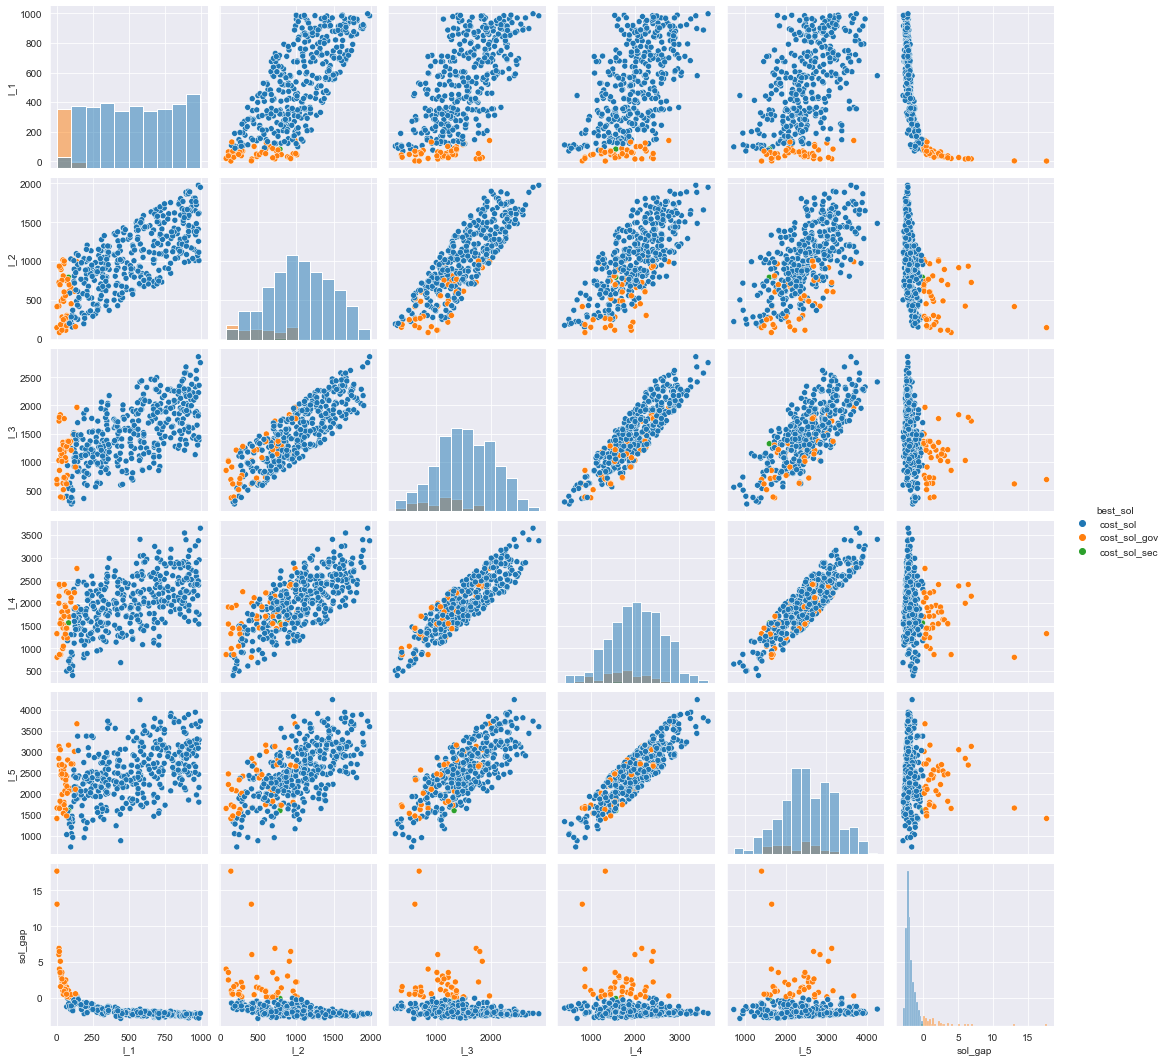

In [11]:
columns = ['l_1', 'l_2', 'l_3', 'l_4', 'l_5', 'sol_gap', 'best_sol']
sns.pairplot(base[columns], hue='best_sol', diag_kind='hist')

In [65]:
base.query('best_sol == "cost_sol_gov" and l_5 < 1000')

,T,I0,d,l,Recovered_rate,ReSusceptible_rate,contagiousness,time,v_sol,v_der_sol,cost_sol,msg_sol,v_sol_gov,v_der_sol_gov,cost_sol_gov,msg_sol_gov,v_sol_sec,v_der_sol_sec,cost_sol_sec,msg_sol_sec,sol_gap,best_sol,groups,d_11,d_12,d_13,d_14,d_15,d_21,d_22,d_23,d_24,d_25,d_31,d_32,d_33,d_34,d_35,d_41,d_42,d_43,d_44,d_45,d_51,d_52,d_53,d_54,d_55,l_1,l_2,l_3,l_4,l_5,v_sol_1,v_sol_2,v_sol_3,v_sol_4,v_sol_5


In [19]:
specific_file = r'/Users/danielablin/Documents/GitHub/Thesis/test_run_2022-11-30_129_401.pickle'
specific_file = r'/Users/danielablin/Documents/GitHub/Thesis/test_run_2022-12-18_129_1000.pickle'
#specific_file = '/Users/danielablin/Documents/GitHub/Thesis/test_run_2022-12-19_129_100.pickle'
base = parse_test(specific_file)

In [16]:
base.groupby('best_sol')['best_sol'].count()

best_sol
cost_sol_gov    100
Name: best_sol, dtype: int64

In [17]:
base[['v_sol', 'S_sol', 'v_sol_gov', 'S_sol_gov']]

,v_sol,S_sol,v_sol_gov,S_sol_gov
0,"[[0.6055637965112961], [0.3645842088154812]]","[[0.0017382488935847316], [0.4264513828353445]]",0.395476,"[[0.09141836926776473], [0.5538308398814205]]"
1,"[[0.6620849831525223], [0.2850671236533514]]","[[0.0005162790745004486], [0.5099083201148568]]",0.328591,"[[0.2859210076185789], [0.7420655024666066]]"
2,"[[0.5774393495990283], [0.34619459653623436]]","[[0.0034334983352291323], [0.46858991321305427]]",0.370986,"[[0.1402055986577382], [0.6192399928450005]]"
3,"[[0.5705935459209611], [0.45324550683741704]]","[[0.0030803481854831], [0.3317548332601258]]",0.458985,"[[0.027765915885926463], [0.40282916333411584]]"
4,"[[0.4448204663565098], [0.2845994627965799]]","[[0.047912785322602215], [0.6472490944680863]]",0.267451,"[[0.9155277366208325], [0.9799930474296463]]"
5,"[[0.43820406794848726], [0.321054152494882]]","[[0.05092633389102768], [0.6056135045293531]]",0.300896,"[[0.45056199034343675], [0.8295453823660364]]"
6,"[[0.4525761868074954], [0.35772280318449023]]","[[0.0376649903265575], [0.5436562641907625]]",0.339994,"[[0.236681765394431], [0.7077938815290352]]"
7,"[[0.439929074709087], [0.28157712596925566]]","[[0.05220572472519244], [0.6553398629048706]]",0.267186,"[[0.9195406258149585], [0.9809736318501872]]"
8,"[[0.997037518558179], [0.36538840064815437]]","[[4.300728908331173e-11], [0.2553370543709966]]",0.457662,"[[0.028506266669911205], [0.4056971095015698]]"
9,"[[0.5214628335277769], [0.3163068384655697]]","[[0.011515149893776938], [0.5463883628034844]]",0.326631,"[[0.29531744528987214], [0.7480515849056225]]"


In [9]:
base.query('best_sol == "cost_sol"')

,T,I0,d,l,contagiousness,time,v_sol,v_der_sol,cost_sol,msg_sol,S_sol,test_results.solution_sol,v_sol_gov,v_der_sol_gov,cost_sol_gov,msg_sol_gov,S_sol_gov,test_results.solution_sol_gov,v_sol_sec,v_der_sol_sec,cost_sol_sec,msg_sol_sec,S_sol_sec,test_results.solution_sol_sec,sol_gap,best_sol,groups,d_11,d_12,d_21,d_22,l_1,l_2,v_sol_1,v_sol_2
1,547,0.0001,"[[13.960271493300002, 3.0555423358999994], [2....","[18.918911566960613, 318.9179356323473]",1,32.119039,"[[0.2485781236444898], [0.320062973597458]]","[[1.355058287799693e-10], [-6.506724048449541e...",4.380555,found solution,"[[0.9946197058978211], [0.998237514762795]]",True,0.248327,"[[-8.923893918504952], [8.923893904640046]]",4.822638,found solution,"[[0.9973228225321951], [0.9993061228866149]]",True,"[[0.2485781236444898], [0.320062973597458]]","[[1.355058287799693e-10], [-6.506724048449541e...",4.380555,found solution,"[[0.9946197058978211], [0.998237514762795]]",True,-0.442084,cost_sol,2,13.960271,3.055542,2.876149,2.004033,18.918912,318.917936,0.248578,0.320063
3,547,0.0001,"[[13.960271493300002, 3.0555423358999994], [2....","[19.218941043840502, 308.3102958825011]",1,111.935445,"[[0.2482712954298927], [0.323059993237215]]","[[2.0311574644438224e-10], [-9.62156576633788e...",4.343908,found solution,"[[0.9946660411914369], [0.9982288837394827]]",True,0.248447,"[[-8.663869239100958], [8.663869239091735]]",4.816037,found solution,"[[0.9972823736811486], [0.9992968990377773]]",True,"[[0.2482712954298927], [0.323059993237215]]","[[2.0311574644438224e-10], [-9.62156576633788e...",4.343908,found solution,"[[0.9946660411914369], [0.9982288837394827]]",True,-0.472129,cost_sol,2,13.960271,3.055542,2.876149,2.004033,19.218941,308.310296,0.248271,0.323060
6,547,0.0001,"[[13.960271493300002, 3.0555423358999994], [2....","[12.872138116449191, 181.37415074196787]",1,54.296834,"[[0.24928399405679666], [0.3349178148352098]]","[[1.6791901202850568e-11], [-3.497824252463033...",4.128240,found solution,"[[0.9927133155934098], [0.9975076990905096]]",True,0.250935,"[[-7.804780098404239], [7.804780098404132]]",4.693283,found solution,"[[0.9962028993103913], [0.9990506681356468]]",True,"[[0.24928399405679666], [0.3349178148352098]]","[[1.6791901202850568e-11], [-3.497824252463033...",4.128240,found solution,"[[0.9927133155934098], [0.9975076990905096]]",True,-0.565044,cost_sol,2,13.960271,3.055542,2.876149,2.004033,12.872138,181.374151,0.249284,0.334918
7,547,0.0001,"[[13.960271493300002, 3.0555423358999994], [2....","[12.927005759846095, 163.54683228686997]",1,48.749733,"[[0.24870109731539705], [0.34172127037304717]]","[[1.8553336644799856e-10], [-9.152971713888292...",4.054422,found solution,"[[0.9926843433713608], [0.9974240657778062]]",True,0.251302,"[[-7.1849369305669315], [7.184936930567652]]",4.676151,found solution,"[[0.995994509163754], [0.9990031151460678]]",True,"[[0.24870109731539705], [0.34172127037304717]]","[[1.8553336644799856e-10], [-9.152971713888292...",4.054422,found solution,"[[0.9926843433713608], [0.9974240657778062]]",True,-0.621730,cost_sol,2,13.960271,3.055542,2.876149,2.004033,12.927006,163.546832,0.248701,0.341721
8,547,0.0001,"[[13.960271493300002, 3.0555423358999994], [2....","[10.606553357858163, 204.11410852848982]",1,30.969201,"[[0.25160657773695166], [0.3167956637313521]]","[[3.624354150133513e-10], [-1.5966765687380757...",4.321344,found solution,"[[0.9916833873254546], [0.997390683741632]]",True,0.250684,"[[-9.367619711396657], [9.367619711396618]]",4.706063,found solution,"[[0.9963374570031028], [0.9990813696562156]]",True,"[[0.25160657773695166], [0.3167956637313521]]","[[3.624354150133513e-10], [-1.5966765687380757...",4.321344,found solution,"[[0.9916833873254546], [0.997390683741632]]",True,-0.384719,cost_sol,2,13.960271,3.055542,2.876149,2.004033,10.606553,204.114109,0.251607,0.316796
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
992,547,0.0001,"[[13.96027

In [20]:
base.groupby('best_sol')['sol_gap'].mean()

best_sol
cost_sol_gov    1.722783
Name: sol_gap, dtype: float64

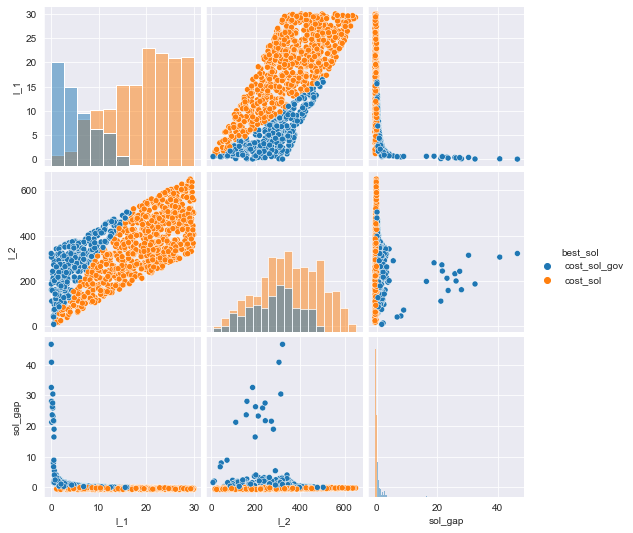

In [7]:
columns = ['l_1', 'l_2', 'sol_gap', 'best_sol']
sns.pairplot(base[columns], hue='best_sol', diag_kind='hist')

In [12]:
base.query('best_sol == "cost_sol_gov"')

,T,I0,d,l,contagiousness,time,v_sol,v_der_sol,cost_sol,msg_sol,S_sol,test_results.solution_sol,v_sol_gov,v_der_sol_gov,cost_sol_gov,msg_sol_gov,S_sol_gov,test_results.solution_sol_gov,v_sol_sec,v_der_sol_sec,cost_sol_sec,msg_sol_sec,S_sol_sec,test_results.solution_sol_sec,sol_gap,best_sol,groups,d_11,d_12,d_21,d_22,l_1,l_2,v_sol_1,v_sol_2
0,547,0.0001,"[[13.960271493300002, 3.0555423358999994], [2....","[0.32840055679877184, 3.911093660915467]",1,28.318382,"[[0.3996481530103393], [0.3347521398336922]]","[[-1.2214584899084002e-10], [4.277733722801713...",4.820442,found solution,"[[0.09389416498881377], [0.6279685216452162]]",True,0.269054,"[[-5.942400875543371], [5.94240087554331]]",4.116703,found solution,"[[0.8881811888836778], [0.9732127661167066]]",True,"[[0.3983281372608579], [0.3983281372608579]]","[[4.440892098500626e-15], [0.0]]",4.983315,found solution,"[[0.08689248422286655], [0.5464722882782105]]",True,0.703739,cost_sol_gov,2,13.960271,3.055542,2.876149,2.004033,0.328401,3.911094,0.399648,0.334752
1,547,0.0001,"[[13.960271493300002, 3.0555423358999994], [2....","[0.3096254287794311, 2.5741847661786434]",1,27.077485,"[[0.4070730795859725], [0.37692694392960835]]","[[-2.6645352591003757e-15], [-2.66453525910037...",4.154979,found solution,"[[0.07813726089750316], [0.5644775403338765]]",True,0.335002,"[[-2.77636948610646], [2.776369486106457]]",3.896685,found solution,"[[0.25714659389444183], [0.7226809430074309]]",True,"[[0.4064409768949246], [0.4064409768949246]]","[[4.529709940470639e-14], [0.0]]",4.189802,found solution,"[[0.07511330493295701], [0.525833430941692]]",True,0.258295,cost_sol_gov,2,13.960271,3.055542,2.876149,2.004033,0.309625,2.574185,0.407073,0.376927
2,547,0.0001,"[[13.960271493300002, 3.0555423358999994], [2....","[0.367935918827036, 2.38817314061886]",1,24.447175,"[[0.38243669465989083], [0.3923056516956781]]","[[1.7763568394002505e-15], [0.0]]",4.061173,found solution,"[[0.11318174914977963], [0.5751536431901099]]",True,0.333491,"[[-1.8971247255083297], [1.897124725508327]]",3.915315,found solution,"[[0.26366916137057184], [0.727223925504183]]",True,"[[0.39002266634237415], [0.39002266634237415]]","[[0.0], [-7.105427357601002e-15]]",4.103275,found solution,"[[0.10067967231591946], [0.5680523490928654]]",True,0.145858,cost_sol_gov,2,13.960271,3.055542,2.876149,2.004033,0.367936,2.388173,0.382437,0.392306
6,547,0.0001,"[[13.960271493300002, 3.0555423358999994], [2....","[0.21454518633594716, 4.106332557062898]",1,34.204820,"[[0.46054764212545746], [0.3132491792788629]]","[[-1.2844081354046466e-10], [2.450661895636585...",4.978661,found solution,"[[0.035206259024139], [0.596272887265423]]",True,0.302661,"[[-6.392064325045846], [6.392064325045851]]",4.186823,found solution,"[[0.4376691506379121], [0.8237491288574201]]",True,"[[0.4564366023040086], [0.4564366023040086]]","[[3.5083047578154947e-14], [0.0]]",5.730331,found solution,"[[0.029207369275492574], [0.408362803172253]]",True,0.791838,cost_sol_gov,2,13.960271,3.055542,2.876149,2.004033,0.214545,4.106333,0.460548,0.313249
7,547,0.0001,"[[13.960271493300002, 3.0555423358999994], [2....","[0.312211150527863, 3.0150106096124474]",1,26.773668,"[[0.4062703321454914], [0.36004678448717153]]","[[-3.552713678800501e-15], [5.329070518200751e...",4.391619,found solution,"[[0.08130357093958744], [0.5876297671068795]]",True,0.321351,"[[-3.550887565470803], [3.5508875654707897]]",4.030425,found solution,"[[0.32213737714162904], [0.7643215612956336]]",True,"[[0.40529635706568323], [0.40529635706568323]]","[[3.9968028886505635e-14], [0.0]]",4.468502,found solution,"[[0.07668176076992232], [0.528718898423585]]",True,0.361193,cost_sol_gov,2,13.960271,3.055542,2.876149,2.004033,0.312211,3.015011,0.406270,0.360047
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
492,547,0.0001,"[[13.960271493300002, 3.0555423358999994], [2....","[0.3201745209028295, 2.0879777518096265]",1,

In [14]:
base.query('best_sol == "cost_sol"')

,T,I0,d,l,contagiousness,time,v_sol,v_der_sol,cost_sol,msg_sol,S_sol,test_results.solution_sol,v_sol_gov,v_der_sol_gov,cost_sol_gov,msg_sol_gov,S_sol_gov,test_results.solution_sol_gov,v_sol_sec,v_der_sol_sec,cost_sol_sec,msg_sol_sec,S_sol_sec,test_results.solution_sol_sec,sol_gap,best_sol,groups,d_11,d_12,d_21,d_22,l_1,l_2,v_sol_1,v_sol_2
3,547,0.0001,"[[13.960271493300002, 3.0555423358999994], [2....","[0.34076306351291774, 1.2125412966851667]",1,28.040082,"[[0.3920076704894918], [0.46732052705726984]]","[[1.2434497875801753e-14], [-1.776356839400250...",3.329863,found solution,"[[0.08479576896414992], [0.4610269095265142]]",True,0.384819,"[[0.2087202588190804], [-0.20872025881907774]]",3.374814,found solution,"[[0.11031215522017934], [0.5818055467816525]]",True,"[[0.4543283794598717], [0.4543283794598717]]","[[0.0], [4.884981308350689e-15]]",3.572926,found solution,"[[0.03045009959379285], [0.41297396753667187]]",True,-0.044951,cost_sol,2,13.960271,3.055542,2.876149,2.004033,0.340763,1.212541,0.392008,0.467321
4,547,0.0001,"[[13.960271493300002, 3.0555423358999994], [2....","[0.3498626096423615, 0.720213550374835]",1,35.296824,"[[0.3876535450645157], [0.5336024072609037]]","[[2.042810365310288e-14], [-1.9095836023552692...",2.963613,found solution,"[[0.07934076569321949], [0.3772353702174545]]",True,0.410845,"[[1.44389071781515], [-1.4438907178151505]]",3.101548,found solution,"[[0.06934656325735193], [0.5148114148982273]]",True,"[[0.5134543438798385], [0.5134543438798385]]","[[0.0], [5.773159728050814e-15]]",3.456826,found solution,"[[0.008785495817763868], [0.2953970133493947]]",True,-0.137936,cost_sol,2,13.960271,3.055542,2.876149,2.004033,0.349863,0.720214,0.387654,0.533602
5,547,0.0001,"[[13.960271493300002, 3.0555423358999994], [2....","[0.2954937704631936, 0.11427827497100998]",1,45.861937,"[[0.4066731562154146], [0.789208569679435]]","[[1.4528822589454649e-11], [-6.19235995813483e...",2.181983,found solution,"[[0.0327095121970532], [0.11275484116168275]]",True,0.477811,"[[2.7411347945814546], [-2.7411347945814426]]",2.429068,found solution,"[[0.01894459282963475], [0.36334689009861243]]",True,"[[0.7614355463460875], [0.7614355463460875]]","[[0.0], [9.92022575196927e-10]]",4.202540,found solution,"[[3.661853399818555e-06], [0.04507557652722513]]",False,-0.247085,cost_sol,2,13.960271,3.055542,2.876149,2.004033,0.295494,0.114278,0.406673,0.789209
9,547,0.0001,"[[13.960271493300002, 3.0555423358999994], [2....","[0.3538098425910708, 1.2062394058384065]",1,26.091571,"[[0.3867936593886538], [0.46913615597175984]]","[[0.0], [-2.6645352591003757e-15]]",3.340483,found solution,"[[0.0918997029380045], [0.46522556223966116]]",True,0.382620,"[[0.34050579178612406], [-0.3405057917861134]]",3.399942,found solution,"[[0.11463134480038889], [0.5876704739444972]]",True,"[[0.4548783002180917], [0.4548783002180917]]","[[0.0], [4.440892098500626e-15]]",3.616052,found solution,"[[0.030121445788390225], [0.4117682201037938]]",True,-0.059459,cost_sol,2,13.960271,3.055542,2.876149,2.004033,0.353810,1.206239,0.386794,0.469136
20,547,0.0001,"[[13.960271493300002, 3.0555423358999994], [2....","[0.2712337638051457, 0.13329510925339882]",1,45.835678,"[[0.41814025697888185], [0.768118588038121]]","[[3.2082780876407924e-11], [-1.245068381727776...",2.130070,found solution,"[[0.028113581848840833], [0.12085509157139916]]",True,0.485773,"[[2.4795681622723054], [-2.4795681622723036]]",2.350529,found solution,"[[0.016040945291717398], [0.34739255977971745]]",True,"[[0.7412544250881556], [0.7412544250881556]]","[[0.0], [1.4852671315068733e-09]]",3.733343,found solution,"[[8.593163395991455e-06], [0.05406941208731264]]",False,-0.220459,cost_sol,2,13.960271,3.055542,2.876149,2.004033,0.271234,0.133295,0.418140,0.768119
28,547,0.0001,"[[13.960271493300002, 3.0555423358999994], [2....","[0.20547212637630327, 0.36341444721929844]",1,51.515239,"[[0.4581978336779599], [0.6194786713544441]]","[[1.851274689101956e-11], [-3.917608459858002e...",2.237294,found so

In [47]:
test = pd.read_pickle(specific_file)

pd.json_normalize(test['sol']).add_suffix('_' + 'sol')

,v_sol,v_der_sol,cost_sol,msg_sol
0,"[[0.2064320942040598], [0.312047723541422]]","[[-2.329294090941403e-09], [8.232072801206414e...","[[4.9214479162269935], [3.2293645087101126]]",found solution
1,"[[0.22990554468665245], [0.2355190776798082]]","[[-2.0481749629652768e-10], [1.332789878460971...","[[4.266148642694597], [4.756871296650207]]",found solution
2,"[[0.1965111119892289], [0.2911002444500456]]","[[-4.022737698505807e-11], [1.582449726811319e...","[[5.489437988026059], [3.8900245359049865]]",found solution
3,"[[0.20191317448338622], [0.282521976575464]]","[[7.23794357782026e-11], [-3.0685853857903567e...","[[5.242602553696153], [4.023752320267301]]",found solution
4,"[[0.19170498369959235], [0.297383646118873]]","[[7.37898631086864e-11], [-2.75207412414602e-10]]","[[5.732623740999082], [3.8044648838641333]]",found solution
...,...,...,...,...
396,"[[0.2113356362763142], [0.27316761457440253]]","[[1.5555912113995873e-10], [-7.282849878720299...","[[4.839905983548522], [4.072627777662296]]",found solution
397,"[[0.1937195194271542], [0.29223199902990327]]","[[5.25091081726714e-12], [-2.0305535031184263e...","[[5.643407020627025], [3.9128828624279253]]",found solution
398,"[[0.19171884308349388], [0.3002769384901494]]","[[2.490878614480607e-10], [-9.090577179904358e...","[[5.713533969935192], [3.7250851679289863]]",found solution
399,"[[0.1921171251133507], [0.32037467782259943]]","[[2.2321913206724275e-09], [-6.988486234149604...","[[5.560761048814051], [3.237050373110736]]",found solution


In [48]:
test['sol'][0]

{'v': array([[0.20643209],
        [0.31204772]]),
 'v_der': array([[-2.32929409e-09],
        [ 8.23207280e-09]]),
 'cost': array([[4.92144792],
        [3.22936451]]),
 'msg': 'found solution',
 'test_results': {}}

# 5 groups

In [137]:
specific_file = None
specific_file = r'/Users/danielablin/Documents/GitHub/Thesis/test_run_2022-11-14_129_300.pickle'
l = [file_name for file_name in os.listdir() if os.path.splitext(file_name)[1] == '.pickle']
groups = 5

l_list = ['l_' + str(i) for i in range(groups)]
v_list = ['v_' + str(i) for i in range(groups)]

base = pd.concat([pd.read_pickle(path) for path in l], axis=0)
base = base[base['l'].apply(lambda x: (x!=0).all())].reset_index(drop=True)

if specific_file:
    base = pd.read_pickle(specific_file)

for col in ['sol', 'sol_gov']:
    base = pd.concat([base.drop(col, axis=1), pd.json_normalize(base[col]).add_suffix('_' + col)], axis=1)
    
for col in ['cost_sol', 'cost_sol_gov']:
    base[col] = base[col].apply(lambda x: x.flatten())
    base[col] = pd.DataFrame(base[col].to_list()).sum(axis=1)
    
base[l_list] = pd.DataFrame(np.array(base['l'].to_list()).reshape(base.shape[0], groups))
base[v_list] = pd.DataFrame(np.array(base['v_sol'].to_list()).reshape(base.shape[0], groups))

base['sol_gap'] = base['cost_sol'] - base['cost_sol_gov']
base['l_t'] = base[l_list].sum(axis=1)

base['best_sol'] = base.apply(lambda row: 'gov' if row['cost_sol_gov'] < row['cost_sol'] else 'game', axis=1)


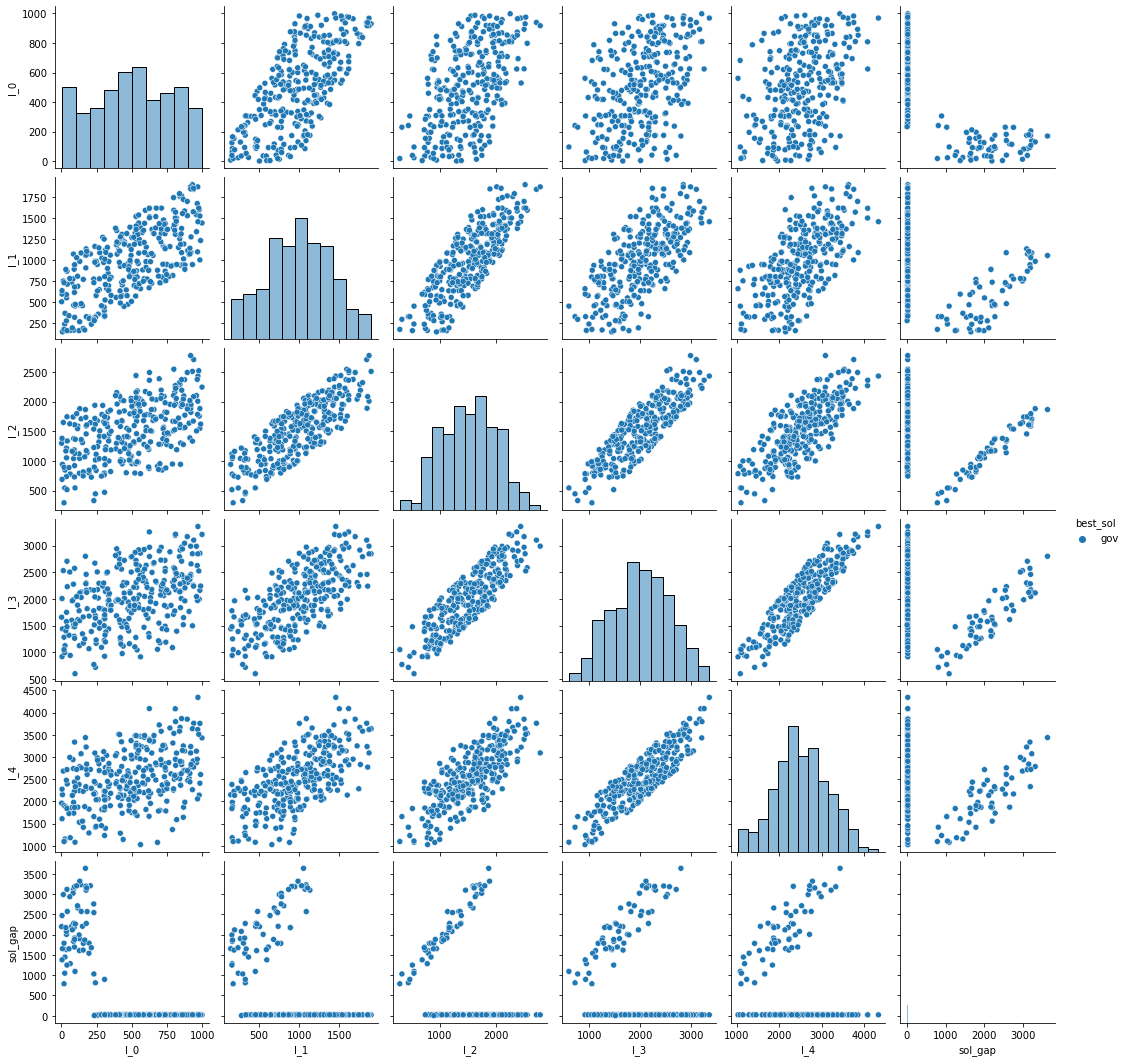

In [138]:
columns = l_list + ['sol_gap', 'best_sol']
sns.pairplot(base[columns], hue='best_sol', diag_kind='hist')

In [145]:
base['test_results.derv_sol'].value_counts()

True    300
Name: test_results.derv_sol, dtype: int64

In [147]:
base.iloc[0]['v_der_sol'].sum()

-640.9531808024917

In [129]:
base_d = pd.read_csv('d_params.csv', header=None).to_numpy()
groups = 5
d_row_split = np.array_split(base_d, groups)
d_full_split = [np.array_split(row_split, groups, axis=1) for row_split in d_row_split]
d = np.array([[split.sum() for split in row_split] for row_split in d_full_split]).T

In [132]:
d_full_split[0][0]

array([[5.54669174, 1.73315293, 0.62966517, 0.34444574],
       [1.91178931, 6.85060448, 2.02608252, 0.49688645],
       [0.754099  , 2.19974674, 8.74286752, 1.92063456],
       [0.45474071, 0.59469874, 2.11723495, 8.37986229]])

In [120]:
groups = [10]

In [127]:
d_row_split = np.split(base_d, groups)
d_full_split = [np.split(row_split, groups, axis=1) for row_split in d_row_split]
d = np.array([[split.sum(axis=0).mean() for split in row_split] for row_split in d_full_split]).T

In [128]:
d

array([[13.96027149,  3.05554234],
       [ 2.87614929,  2.00403347]])

In [85]:
np.array_split(a[0], 3, axis=1)[0].shape

(6, 6)

In [68]:
groups = 5

number_of_groups = int(base_d.shape[0] / groups)
d_reverse = []
for i in range(number_of_groups):
    
    end = base_d.shape[0] - i*groups - 1
    
    if i == number_of_groups:
        start = 0
    else:
        start = base_d.shape[0] - (i+1)*groups
    d_reverse.append(base_d[start:end, start:end])

In [71]:
d_reverse

[array([[1.05912343, 0.46049255, 0.14900805, 0.08952481],
        [0.50147315, 0.69791926, 0.25442206, 0.16527957],
        [0.26048401, 0.40841432, 0.49283785, 0.23314546],
        [0.17866536, 0.3028942 , 0.26616606, 0.47178998]]),
 array([[2.63508509, 1.67976655, 1.23930757, 0.88052278],
        [1.8175392 , 2.57013319, 1.60306436, 1.03031922],
        [1.50471681, 1.79883683, 2.08762728, 1.2206436 ],
        [1.19848934, 1.29607616, 1.36838022, 1.45463422]]),
 array([[6.85060448, 2.02608252, 0.49688645, 0.26707748],
        [2.19974674, 8.74286752, 1.92063456, 0.43491127],
        [0.59469874, 2.11723495, 8.37986229, 2.05515346],
        [0.33184558, 0.49771862, 2.13355168, 4.05206879]])]

In [39]:
groups = 2

In [41]:
np.split(base_d, [10,16])

[array([13.29495424, 15.98130145, 18.12031504, 18.61737406, 14.7726254 ,
        15.39368593, 15.64380046, 16.58064202, 15.54986346, 12.90504864]),
 array([12.1986125 ,  9.78413813,  6.66109773,  5.07279876,  4.80296875,
         4.06000829]),
 array([], dtype=float64)]

In [ ]:
if groups = 2:
    
    d = base_d[:10]

In [26]:
base.query('best_sol=="gov" and l_rate<0.5')[['d_11', 'd_12', 'd_21', 'd_22', 'l_1', 'l_2', 'l_rate']].sort_values('l_rate')

,d_11,d_12,d_21,d_22,l_1,l_2,l_rate
1796,0.216344,0.203078,0.127279,0.223260,2.5,25.0,0.100000
1073,0.088949,0.246902,0.208737,0.127716,2.5,25.0,0.100000
766,0.141109,0.179454,0.224510,0.200378,2.0,20.0,0.100000
1149,0.150691,0.240781,0.138095,0.082563,4.5,45.0,0.100000
309,0.239258,0.167837,0.170858,0.063470,1.0,10.0,0.100000
...,...,...,...,...,...,...,...
700,0.238499,0.197975,0.249199,0.231173,0.5,1.5,0.333333
1215,0.211393,0.196377,0.146888,0.234778,1.5,4.5,0.333333
1636,0.029603,0.068238,0.197800,0.200729,2.5,7.5,0.333333
1511,0.147283,0.218465,0.231567,0.079277,4.5,13.5,0.333333


In [69]:
test = base.astype(str)[['T', 'I0', 'l']].sum(axis=1).astype('category')

In [70]:
test.cat.categories

Index(['4130.019788760396412353[ 2. 12.]', '4130.019788760396412353[ 2. 16.]',
       '4130.019788760396412353[ 2. 20.]',
       '4130.019788760396412353[ 2.5 17.5]',
       '4130.019788760396412353[ 2.5 20. ]',
       '4130.019788760396412353[ 3. 12.]', '4130.019788760396412353[ 3. 18.]',
       '4130.019788760396412353[ 3. 30.]',
       '4130.019788760396412353[ 4.5 22.5]',
       '4130.019788760396412353[ 4.5 31.5]',
       ...
       '9160.0996238667730245[1. 1.]', '9160.0996238667730245[1. 4.]',
       '9160.0996238667730245[1. 6.]', '9160.0996238667730245[1. 7.]',
       '9160.0996238667730245[1.5 4.5]', '9160.0996238667730245[1.5 7.5]',
       '9160.0996238667730245[1.5 9. ]', '9160.0996238667730245[2. 2.]',
       '9160.0996238667730245[2. 8.]', '9160.0996238667730245[3. 6.]'],
      dtype='object', length=2572)

In [23]:
pd.DataFrame(np.array(base['d'].to_list()).reshape(base.shape[0], groups**2)).sum(axis=1)

0        0.333098
1        0.253309
2        0.468736
3        0.621143
4        0.691815
           ...   
11349    0.642052
11350    0.642052
11351    0.642052
11352    0.642052
11353    0.642052
Length: 11354, dtype: float64

In [6]:
base.columns

Index(['T', 'I0', 'd', 'l', 'Recovered_rate', 'ReSusceptible_rate', 'time',
       'v_sol', 'v_der_sol', 'cost_sol', 'msg_sol', 'test_results.derv_sol',
       'test_results.cost_derv_sol', 'test_results.solution_sol', 'v_sol_gov',
       'v_der_sol_gov', 'cost_sol_gov', 'msg_sol_gov',
       'test_results.derv_sol_gov', 'test_results.cost_derv_sol_gov',
       'test_results.solution_sol_gov', 'd_11', 'd_12', 'd_21', 'd_22', 'l_1',
       'l_2', 'sol_gap', 'best_sol', 'd_between', 'd_within', 'd_1', 'd_2',
       'l_rate'],
      dtype='object')

In [99]:
base[columns].isna().sum()

d_t          0
d_between    0
d_within     0
best_sol     0
sol_gap      0
l_rate       0
dtype: int64

In [4]:
columns = ['d_t', 'd_between', 'd_within', 'sol_gap', 'l_rate']
base_cat = base.copy()
for col in columns:
    base_cat[col] = pd.qcut(base_cat[col], 20, duplicates='drop', labels=False)

In [113]:
columns = ['d_t', 'd_between', 'd_within', 'best_sol', 'sol_gap', 'l_rate']
sns.pairplot(base[columns], hue='best_sol')

Error in callback <function flush_figures at 0x13f35ff70> (for post_execute):



KeyboardInterrupt



In [116]:
18/3

6.0

In [7]:
columns = ['d_t', 'd_between', 'd_within', 'best_sol', 'sol_gap', 'l_rate', 'l_1', 'l_2', 'd_11', 'd_12', 'd_21', 'd_22']
test = base_cat[columns].query('best_sol == "game"').merge(base_cat[columns].query('best_sol == "gov"'), on=['d_t', 'd_between', 'd_within', 'l_rate'])
test.query('d_12_x < d_21_x & d_12_y > d_21_y')

,d_t,d_between,d_within,best_sol_x,sol_gap_x,l_rate,l_1_x,l_2_x,d_11_x,d_12_x,d_21_x,d_22_x,best_sol_y,sol_gap_y,l_1_y,l_2_y,d_11_y,d_12_y,d_21_y,d_22_y
0,2,3,5,game,2,3,3.0,18.0,0.007475,0.044458,0.143374,0.137791,gov,6,3.0,18.0,0.150957,0.119883,0.057122,0.002485
1,2,3,5,game,2,3,3.0,18.0,0.007475,0.044458,0.143374,0.137791,gov,12,1.0,6.0,0.120841,0.115340,0.075620,0.032127
2,2,3,5,game,2,3,3.0,18.0,0.007475,0.044458,0.143374,0.137791,gov,9,4.5,27.0,0.120841,0.115340,0.075620,0.032127
3,2,3,5,game,2,3,3.0,18.0,0.007475,0.044458,0.143374,0.137791,gov,6,3.0,18.0,0.150957,0.119883,0.057122,0.002485
4,2,3,5,game,2,3,3.0,18.0,0.007475,0.044458,0.143374,0.137791,gov,12,1.0,6.0,0.120841,0.115340,0.075620,0.032127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9198,5,13,2,game,3,1,2.5,20.0,0.135541,0.013209,0.101079,0.159162,gov,4,2.0,16.0,0.239056,0.108650,0.005925,0.059777
9205,14,9,16,game,3,0,4.5,40.5,0.039640,0.157483,0.186509,0.198391,gov,10,2.5,25.0,0.222160,0.197725,0.145962,0.029291
9206,15,10,16,game,3,1,1.0,8.0,0.141151,0.111144,0.240548,0.121414,gov,11,3.5,28.0,0.188050,0.203080,0.141509,0.070580
9207,15,10,16,game,3,1,1.0,8.0,0.141151,0.111144,0.240548,0.121414,gov,13,2.5,20.0,0.238740,0.228651,0.125368,0.023854


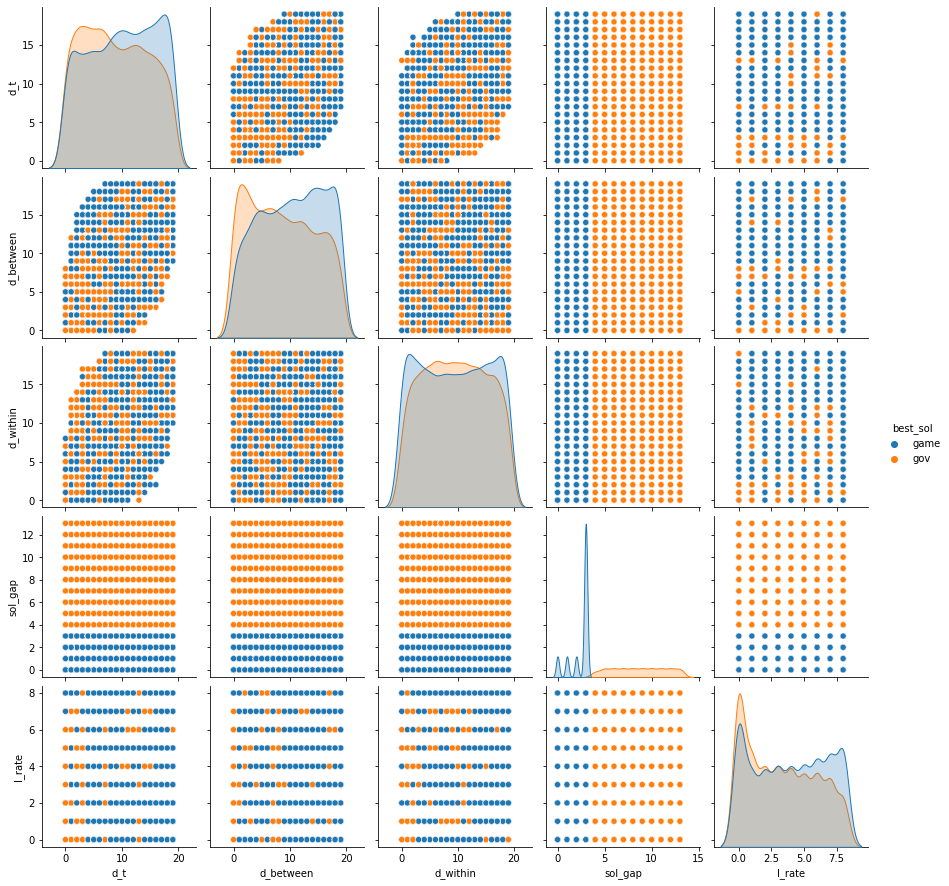

In [108]:
columns = ['d_t', 'd_between', 'd_within', 'best_sol', 'sol_gap', 'l_rate']
sns.pairplot(base_cat[columns], hue='best_sol')

In [ ]:
sns.lineplot(data=base, x="T", y="sol_gap", ci=36)#, style='nil_nil')

In [17]:
params = ['T', 'd_11', 'd_12', 'd_21', 'd_22', 'l_1', 'l_2', 'l_rate']
test = base.copy()
cat_params = []
for var in params:
    test[var + '_cat'] = pd.cut(test[var], 5)
    cat_params.append(var + '_cat')

In [20]:
test.groupby(test[cat_params].astype('str').sum(axis=1))['T'].count().max()

7

In [172]:
formula = 'y ~ ' + ' + '.join(cat_params)

mod1 = smf.glm(formula=formula, data=test, family=sm.families.Binomial()).fit()
test['pred'] = mod1.predict(test)
fpr, tpr, thresholds = metrics.roc_curve(test['y'].astype(int), test['pred'])
print('AUC: ', metrics.auc(fpr, tpr))
mod1.summary()

AUC:  0.8165527816114709


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                10979
Model:                            GLM   Df Residuals:                    10852
Model Family:                Binomial   Df Model:                          126
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -5682.2
Date:                Sun, 23 Oct 2022   Deviance:                       11364.
Time:                        08:26:55   Pearson chi2:                 1.06e+04
No. Iterations:                   100   Pseudo R-squ. (CS):             0.2936
Covariance Type:            nonrobust                                         
=======================================================================================================================
                                                          coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------
Intercept                                               6.5741      0.338     19.478      0.000       5.913       7.236
T_cat[T.Interval(51.85, 101.7, closed='right')]        -2.6870      0.217    -12.366      0.000      -3.113      -2.261
T_cat[T.Interval(101.7, 151.55, closed='right')]       -3.6446      0.217    -16.810      0.000      -4.070      -3.220
T_cat[T.Interval(151.55, 201.4, closed='right')]       -4.3227      0.223    -19.412      0.000      -4.759      -3.886
T_cat[T.Interval(201.4, 251.25, closed='right')]       -4.6232      0.222    -20.866      0.000      -5.057      -4.189
T_cat[T.Interval(251.25, 301.1, closed='right')]       -4.7548      0.223    -21.308      0.000      -5.192      -4.317
T_cat[T.Interval(301.1, 350.95, closed='right')]       -4.3720      0.219    -19.963      0.000      -4.801      -3.943
T_cat[T.Interval(350.95, 400.8, closed='right')]       -4.4901      0.221    -20.319      0.000      -4.923      -4.057
T_cat[T.Interval(400.8, 450.65, closed='right')]       -4.2038      0.219    -19.229      0.000      -4.632      -3.775
T_cat[T.Interval(450.65, 500.5, closed='right')]       -4.0038      0.217    -18.447      0.000      -4.429      -3.578
T_cat[T.Interval(500.5, 550.35, closed='right')]       -3.9632      0.217    -18.249      0.000      -4.389      -3.538
T_cat[T.Interval(550.35, 600.2, closed='right')]       -3.6471      0.217    -16.808      0.000      -4.072      -3.222
T_cat[T.Interval(600.2, 650.05, closed='right')]       -3.5182      0.218    -16.173      0.000      -3.945      -3.092
T_cat[T.Interval(650.05, 699.9, closed='right')]       -3.5355      0.215    -16.439      0.000      -3.957      -3.114
T_cat[T.Interval(699.9, 749.75, closed='right')]       -3.3586      0.216    -15.532      0.000      -3.782      -2.935
T_cat[T.Interval(749.75, 799.6, closed='right')]       -3.2111      0.215    -14.942      0.000      -3.632      -2.790
T_cat[T.Interval(799.6, 849.45, closed='right')]       -3.1412      0.217    -14.484      0.000      -3.566      -2.716
T_cat[T.Interval(849.45, 899.3, closed='right')]       -2.9390      0.212    -13.841      0.000      -3.355      -2.523
T_cat[T.Interval(899.3, 949.15, closed='right')]       -2.6925      0.217    -12.384      0.000      -3.119      -2.266
T_cat[T.Interval(949.15, 999.0, closed='right')]       -2.6392      0.215    -12.303      0.000      -3.060      -2.219
d_11_cat[T.Interval(0.0125, 0.025, closed='right')]    -0.3913      0.145     -2.707      0.007      -0.675      -0.108
d_11_cat[T.Interval(0.025, 0.0375, closed='right')]    -0.4178      0.144     -2.898      0.004      -0.700      -0.135
d_11_cat[T.Interval(0.0375, 0.05, closed='right')]     -0.5857      0.149     -3.92

In [156]:
0.91*2-1

0.8200000000000001

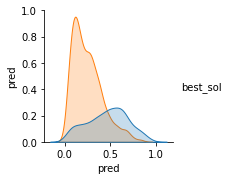

In [132]:

sns.pairplot(test[['best_sol', 'pred']], hue='best_sol')

In [10]:
hm_test = base.query('cost_sol_gov > cost_sol & msg_sol_gov == "found solution"')
hm_test.set_index(['d_11', 'd_12'], inplace=True)

In [20]:
sns.heatmap(test.query('best_sol=="game"').drop('best_sol', axis=1))

ValueError: could not convert string to float: 'd_11'

In [37]:
base.query('cost_sol > cost_sol_gov')[['d_11', 'd_12', 'd_21', 'd_22']].sum(axis=1).mean()

0.5352548689346586

In [38]:
base.query('cost_sol < cost_sol_gov')[['d_11', 'd_12', 'd_21', 'd_22']].sum(axis=1).mean()

0.4258546243229284

In [39]:
base.query('cost_sol > cost_sol_gov').eval('d_12*d_21').mean()

0.018343999469177436

In [40]:
base.query('cost_sol > cost_sol_gov')[['d_11', 'd_22', 'T']].mean()

d_11      0.140039
d_22      0.123119
T       553.483402
dtype: float64

In [41]:
base.query('cost_sol < cost_sol_gov').eval('d_12*d_21').mean()

0.004261639915904168

In [24]:
base

,T,I0,d,l,Recovered_rate,ReSusceptible_rate,time,v_sol,v_der_sol,cost_sol,msg_sol,v_sol_gov,v_der_sol_gov,cost_sol_gov,msg_sol_gov,d_11,d_12,d_21,d_22
0,914,0.037480,"[[0.8565816349272409, 0.6292831855177051], [0....","[50, 2300]",0,0,29.335019,"[[0.13220528342631357, 0.8116401933875722], [0...","[[4.804618924936221e-10, -8.510906290837283e-0...",591.848974,found solution,"[[0.062481132833233526, 0.062481132833233526],...","[[-239.78417793861823, -250.21161963344957], [...",316.343050,found solution,0.856582,0.629283,0.483606,0.908240
1,210,0.002814,"[[0.1811095865877227, 0.8615772933961338], [0....","[77, 154]",0,0,3.043460,"[[0.5083858220791662, 0.3974059127194974], [0....","[[-2.7481602327128485e-08, -1.6335377495124703...",22.342767,found solution,"[[0.372188959122877, 0.372188959122877], [0.37...","[[-5.350097044444526, -2.5515503095256253], [-...",20.813578,found solution,0.181110,0.861577,0.150991,0.959984
2,448,0.092969,"[[0.27210870926413344, 0.7953386076766586], [0...","[46, 1702]",0,0,12.776767,"[[0.2179515946389642, 0.7376240890846264], [0....","[[8.363087999896379e-12, -1.2317620257107365e-...",621.799149,found solution,"[[0.08044517647035616, 0.08044517647035616], [...","[[-148.10193159888706, -145.07554906301644], [...",450.403564,found solution,0.272109,0.795339,0.902819,0.237061
3,647,0.072381,"[[0.3221893262459786, 0.9652239563946082], [0....","[38, 798]",0,0,16.529536,"[[0.19676556812392365, 0.513278486087027], [0....","[[7.09370340246096e-11, -2.727185588469183e-09...",328.989947,found solution,"[[0.0889846695016355, 0.0889846695016355], [0....","[[-117.29241219513654, -112.9960958740204], [9...",229.319828,found solution,0.322189,0.965224,0.740347,0.458198
4,458,0.051370,"[[0.9731576326301973, 0.2951818004700274], [0....","[7, 35]",0,0,4.466413,"[[0.23738641299054425, 0.9423493485621331], [0...","[[3.0604496714659035e-10, -5.625146348720023e-...",51.060503,found solution,"[[0.22088180515676975, 0.22088180515676975], [...","[[-7.448328917304595, -18.637151466984033], [-...",39.520211,found solution,0.973158,0.295182,0.260556,0.909412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2947,792,0.025416,"[[0.8212704864063497, 0.2837052908809725], [0....","[20, 140]",0,0,9.007427,"[[0.18024703769729836, 0.7616229153895309], [0...","[[-4.1801584416134574e-10, -9.296900582711487e...",83.575289,found solution,"[[0.15537822189308395, 0.15537822189308395], [...","[[-24.046523310038427, -38.43112421111843], [-...",58.739820,found solution,0.821270,0.283705,0.229973,0.869230
2948,400,0.017882,"[[0.11898628366519559, 0.45504947518363503], [...","[50, 550]",0,0,2.094115,"[[0.42591439004906206, 0.8562517018068917], [0...","[[-1.509903313490213e-14, 2.042810365310288e-1...",87.958068,found solution,"[[0.22615422669284008, 0.22615422669284008], [...","[[-17.2696117909372, -15.22442606717092], [26....",64.403508,found solution,0.118986,0.455049,0.437304,0.121604
2949,903,0.075246,"[[0.3744280344312455, 0.6485019550454362], [0....","[87, 2088]",0,0,6.991305,"[[0.13164969703267537, 0.3750856223525718], [0...","[[1.4622969501942862e-10, -9.226468478118477e-...",616.322075,found solution,"[[0.06294028947463672, 0.06294028947463672], [...","[[-230.19585838102168, -233.5574628223527], [-...",473.486791,found solution,0.374428,0.648502,0.332261,0.522544
2950,657,0.090897,"[[0.49718973502944186, 0.7011242546638777], [0...","[33, 1551]",0,0,3.632560,"[[0.1684279186438112, 0.716381084588251], [0.0...","[[-2.5579538487363607e-12, 2.311484337269576e-...",622.131160,found solution,"[[0.09970753370066586, 0.09970753370066586], [...","[[-83.46315812720917, -90.22237384507537], [22...",449.958674,found solution,0.497190,0.701124,0.390621,0.036780


In [26]:
base.query('cost_sol < cost_sol_gov')[['d_11', 'd_22', 'T']].mean()

d_11      0.502530
d_22      0.172665
T       567.394737
dtype: float64

In [16]:
base.query('cost_sol < cost_sol_gov').shape

(76, 19)

In [17]:
base.query('cost_sol > cost_sol_gov').shape

(2876, 19)